# Pitchfork album reviews analysis
This is very much "in-progress", and mostly a personal learning experience.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7,4)

Using `sqlalchemy` read table from the database to Pandas DataFrame.

In [2]:
# read table from db

engine = create_engine(open('dbinfo.txt', 'r').read().rstrip())
df_reviews = pd.read_sql_table('review', engine)

In [3]:
df_reviews[:3]

,id,review_url,artist_url,second_artist_url,artist,second_artist,album,year,second_year,label,second_label,genre,review_header,review_body,author,date,score,bnm
0,22651,http://pitchfork.com/reviews/albums/22651-myst...,http://pitchfork.com/artists/34101-monster-rally/,None,Monster Rally,None,Mystery Cove,2016.0,NaN,Gold Robot,None,Electronic,"Mystery Cove, the fourth Monster Rally full-le...","Way back in the 10-cent bin, between the 40-od...",Paul Thompson,2016-11-30,6.5,False
1,22596,http://pitchfork.com/reviews/albums/22596-six-...,http://pitchfork.com/artists/3554-steve-reich/,http://pitchfork.com/artists/11388-terry-riley/,Steve Reich,Terry Riley,Six Pianos / Keyboard Study #1,2016.0,NaN,Forced Exposure,None,Experimental,Berlin's FILM Recordings offers a new recordin...,The 1970s was Steve Reich’s decade; although h...,Daniel Martin-McCormick,2016-11-30,7.2,False
2,22650,http://pitchfork.com/reviews/albums/22650-pc-m...,http://pitchfork.com/artists/31016-various-art...,None,Various Artists,None,"PC Music, Vol. 2",2016.0,NaN,PC Music,None,None,Cobbling together styles from Top 40 and the d...,"Three years out from PC Music’s inception, it ...",Thea Ballard,2016-11-30,6.2,False


## Scores & BNM

In [4]:
df_reviews['score'].describe()

count    18309.000000
mean         7.005358
std          1.294891
min          0.000000
25%          6.400000
50%          7.200000
75%          7.800000
max         10.000000
Name: score, dtype: float64

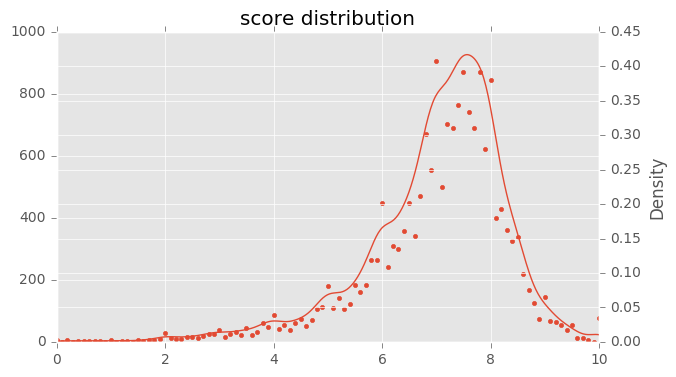

In [5]:
df_reviews['score'].value_counts().sort_index().plot(marker='.', linestyle='None', xlim=(0,10))
df_reviews['score'].plot(kind='kde', ax=plt.gca().twinx(), xlim=(0,10))
plt.title('score distribution')

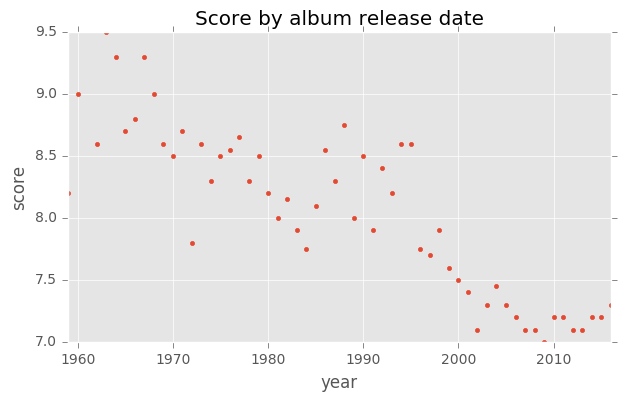

In [6]:
df_reviews.groupby('year').aggregate(np.median)['score'].plot(marker='.', linestyle='None')
plt.ylabel('score')
plt.title('Score by album release date')

,artist,album,score
7173,Weezer,Death to False Metal,3.5
7821,Incredible String Band,Incredible String Band,5.2
9000,Radiohead,Pablo Honey: Collector's Edition,5.4


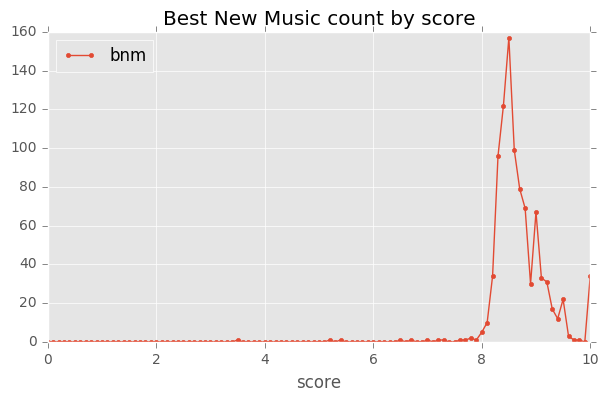

In [7]:
df_reviews.groupby('score').aggregate(np.sum)['bnm'].plot(marker='.')
plt.legend(loc=2)
plt.title('Best New Music count by score')
# outliers: the weezer one is my mistake, it's a multi-review with Pinkerton. Pablo Honey is actually 5.4 BNM!
df_reviews[(df_reviews['score'] < 6) & (df_reviews['bnm'] == True)][['artist', 'album', 'score']]

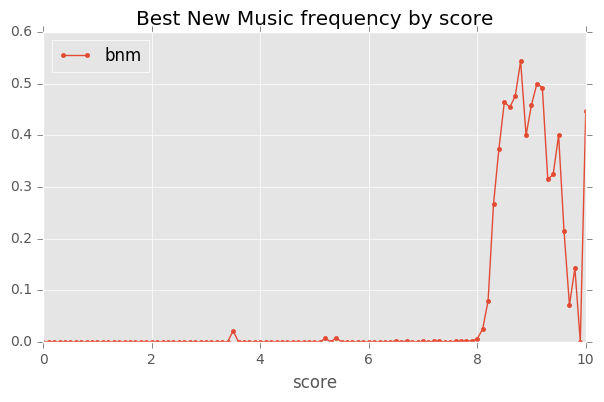

In [8]:
df_reviews.groupby('score').aggregate(np.mean)['bnm'].plot(marker='.')
plt.legend(loc=2)
plt.title('Best New Music frequency by score')

## Genres

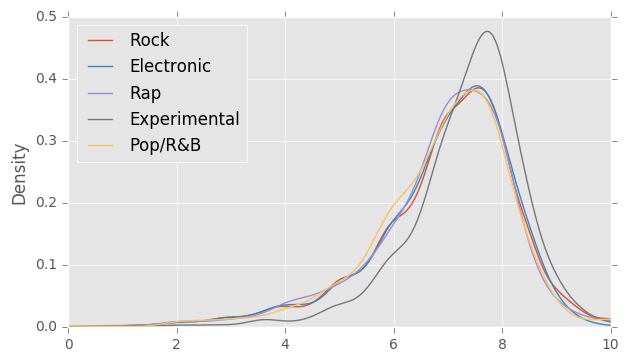

In [9]:
legend_str = []
for g in ['Rock', 'Electronic', 'Rap', 'Experimental', 'Pop/R&B']:
    df_reviews[[g in str(x) for x in df_reviews['genre']]]['score'].plot(kind='kde', xlim=(0,10))
    legend_str.append(g)
plt.legend(legend_str, loc=2)

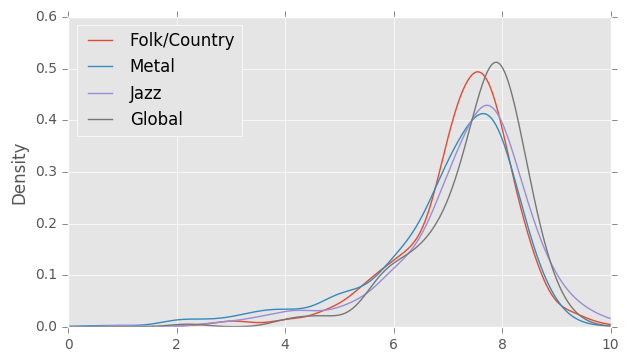

In [10]:
legend_str = []
for g in ['Folk/Country', 'Metal', 'Jazz', 'Global']:
    df_reviews[[g in str(x) for x in df_reviews['genre']]]['score'].plot(kind='kde', xlim=(0,10))
    legend_str.append(g)
plt.legend(legend_str, loc=2)

In [12]:
print('num genres:', len(df_reviews['genre'].value_counts()))
print('num labels:', len(df_reviews['label'].value_counts()))
print('num authors:', len(df_reviews['author'].value_counts()))

num genres: 99
num labels: 3220
num authors: 432


## Reissues

In [13]:
df_reissues = df_reviews[df_reviews['second_year'].notnull()]
df_not_reissues = df_reviews[df_reviews['second_year'].isnull()]

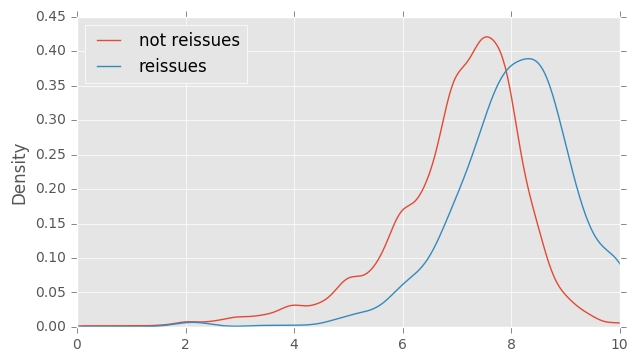

In [14]:
df_not_reissues['score'].plot(kind='kde', xlim=(0,10))
df_reissues['score'].plot(kind='kde', xlim=(0,10))
plt.legend(['not reissues', 'reissues'], loc=2)

## Authors

In [15]:
df_reviews.groupby('author').aggregate([np.median, 'count'])['score'].sort_values(by='count', ascending=False)[:20]

,median,count
author,,
Joe Tangari,7.50,817
Stephen M. Deusner,7.30,725
Ian Cohen,6.50,696
Brian Howe,7.30,499
Mark Richardson,7.80,475
Stuart Berman,7.20,444
Marc Hogan,6.85,438
Nate Patrin,7.30,346
Marc Masters,7.50,311


## Labels

In [16]:
df_reviews.groupby('label').aggregate([np.median, 'count'])['score'].sort_values(by='count', ascending=False)[:20]

,median,count
label,,
self-released,7.10,415
Drag City,7.40,269
Sub Pop,7.30,267
Thrill Jockey,7.20,244
Merge,7.40,239
Warp,7.30,209
Domino,7.40,203
Matador,7.60,202
Columbia,7.00,196
